In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

In [9]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [10]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
## We will be validating based on data from the training set as well. 
## We will make predictions based on the test set.

train['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.NaN

data = pd.concat([train,test])

C:\Users\Dhamodharan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [13]:
data.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'train_test'],
      dtype='object')

In [14]:
data.head(5)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,train_test
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,1


## Data Exploration

In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
train_test     891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [16]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [17]:
## Separting the numnerical and categorical columns for exploratory analysis

num_col = train[['Age','SibSp','Parch','Fare']]
cat_col = train[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

C:\Users\Dhamodharan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Dhamodharan\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


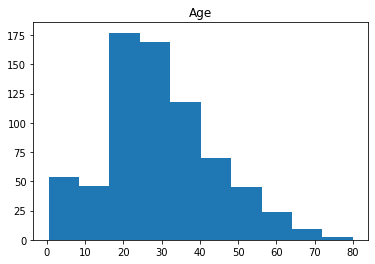

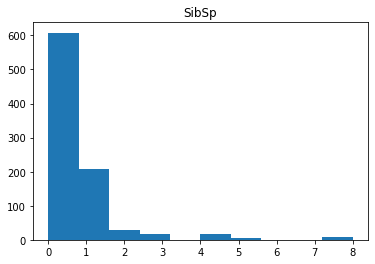

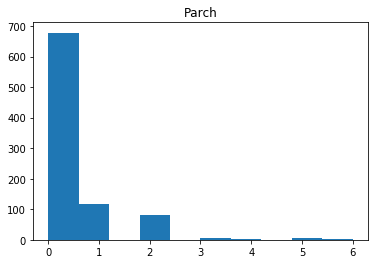

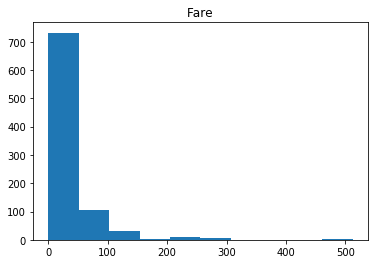

In [19]:
## Plotting Histogram for the numerical columns

for i in num_col:
    plt.hist(num_col[i])
    plt.title(i)
    plt.show()

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


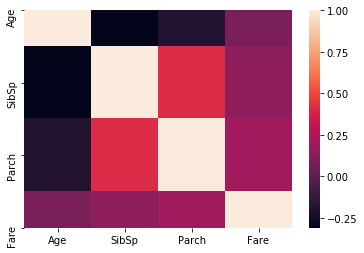

In [21]:
## Plotting the correlation chart

print(num_col.corr())
sns.heatmap(num_col.corr())

In [23]:
# Comparing the Survival rate across Age, SibSp,Parch, Fare

pd.pivot_table(train, index= 'Survived', values =['Age', 'SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


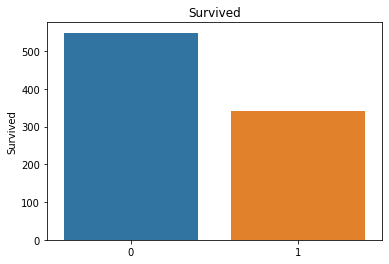

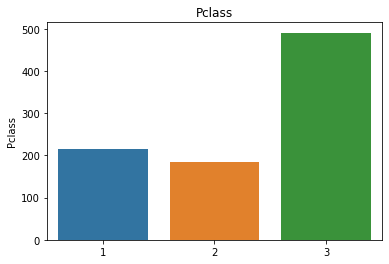

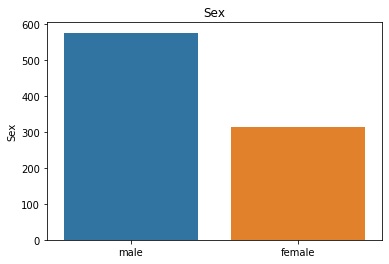

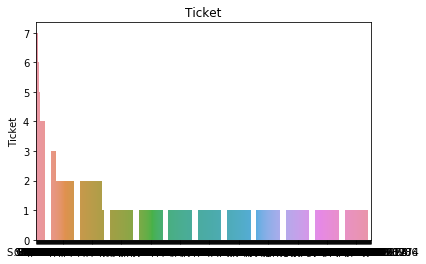

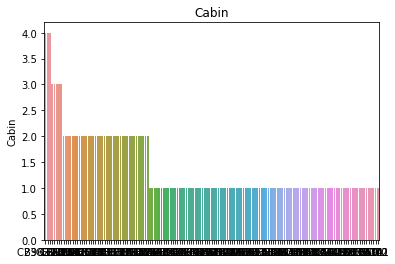

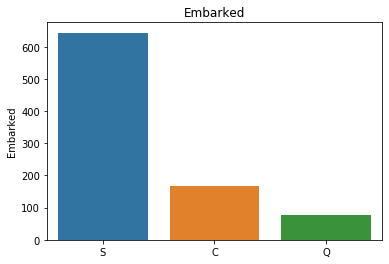

In [24]:
# Plotting Bar plots for Categorical columns

for i in cat_col:
    sns.barplot(cat_col[i].value_counts().index, cat_col[i].value_counts()).set_title(i)
    plt.show()
    

In [32]:
## From the above barplot, we decide to move forward with the rest of the columns leaving 'cabin' column. 
## Since there are many categories in it
## Creating a pivot table for the rest of categorical columns

print(pd.pivot_table(train, index = 'Survived', columns= 'Pclass', values = 'Ticket', aggfunc='count'))

print()

print(pd.pivot_table(train, index = 'Survived', columns= 'Sex', values = 'Ticket', aggfunc='count'))

print()

print(pd.pivot_table(train, index = 'Survived', columns= 'Embarked', values = 'Ticket', aggfunc='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


## Feature Engineering

Checking on the three columns to see if they impact the survival rate. 

1. Cabin Class
2. Ticket Types
3. Titles

In [37]:
## Cabin Class 
## Creating the categories for the Cabin class

train['cabin_multiple'] = train.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

train['cabin_multiple'].value_counts()

0    687
1    180
2     16
3      6
4      2
Name: cabin_multiple, dtype: int64

In [38]:
# Creating a pivot table based on the newly created 'cabin_multiple' column

pd.pivot_table(train, index = 'Survived', columns = 'cabin_multiple', values = 'Ticket', aggfunc= 'count')

cabin_multiple,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [41]:
## Creating categories based on the cabin letter 

train['cabin_cat'] = train.Cabin.apply(lambda x: str(x)[0])

## Comparing the Survival rates by creating a pivot table

print(train.cabin_cat.value_counts())

pd.pivot_table(train, index = 'Survived', columns ='cabin_cat', values ='Ticket', aggfunc= 'count')

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: cabin_cat, dtype: int64


cabin_cat,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


In [42]:
## Ticket Class
## Types of ticket classification - Numeric & Non-Numeric

train['numeric'] = train.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
train['non-numeric'] = train.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)


In [43]:
train['numeric'].value_counts()

1    661
0    230
Name: numeric, dtype: int64

In [45]:
train['non-numeric'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
c              5
fcc            5
sopp           3
pp             3
wep            3
scah           2
sotono2        2
swpp           2
ppp            2
sc             1
fc             1
sca4           1
as             1
scahbasle      1
sp             1
fa             1
scow           1
sop            1
casoton        1
Name: non-numeric, dtype: int64

In [46]:
## Creating a pivot table for comapring the Ticket class (Numeric) with the Survival rate

pd.pivot_table(train, index ='Survived', columns = 'numeric', values = 'Ticket', aggfunc= 'count')

numeric,0,1
Survived,,
0,142,407
1,88,254


In [47]:
## Creating a pivot table for comapring the Ticket class (Non-Numeric) with the Survival rate

pd.pivot_table(train, index ='Survived', columns = 'non-numeric', values = 'Ticket', aggfunc= 'count')

non-numeric,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


In [48]:
## Title
## Extracting the titles from the Name column

train['title'] = train.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [49]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,cabin_multiple,cabin_cat,numeric,non-numeric,title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,n,0,a5,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,1,C,0,pc,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,0,n,0,stono2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,1,C,1,0,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,0,n,1,0,Mr


In [50]:
train['title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Don               1
Capt              1
the Countess      1
Ms                1
Mme               1
Jonkheer          1
Sir               1
Lady              1
Name: title, dtype: int64

## Data Preprocessing 

In [52]:
## Including the categorical transformations performed in the train dataset in the full dataset



Age            1309
Cabin          1309
Embarked       1309
Fare           1309
Name           1309
Parch          1309
PassengerId    1309
Pclass         1309
Sex            1309
SibSp          1309
Survived       1309
Ticket         1309
train_test     1309
dtype: int64

In [53]:
## Creating the categories for the Cabin class

data['cabin_multiple'] = data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))

## Creating categories based on the cabin letter 

data['cabin_cat'] = data.Cabin.apply(lambda x: str(x)[0])

## Types of ticket classification - Numeric & Non-Numeric

data['numeric'] = data.Ticket.apply(lambda x:1 if x.isnumeric() else 0)
data['non-numeric'] = data.Ticket.apply(lambda x: ''.join(x.split(' ')[:-1]).replace('.','').replace('/','').lower() if len(x.split(' ')[:-1]) >0 else 0)

## Extracting the titles from the Name column

data['title'] = data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())



In [54]:
## Imputing the null values 

data.Age = data.Age.fillna(train.Age.median())
data.Fare = data.Fare.fillna(train.Fare.median())

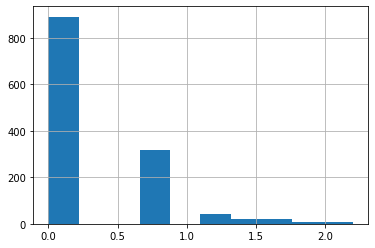

In [57]:
## Log transformation - From the descriptive analysis we could see the SibSp and Fare columns are not normally distributed

data['norm_sibsp'] = np.log(data.SibSp + 1)
data['norm_sibsp'].hist()


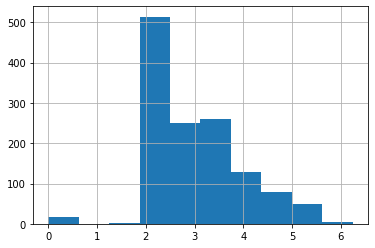

In [56]:
data['norm_fare'] = np.log(data.Fare + 1)
data['norm_fare'].hist()

In [62]:
# Converting the PClass coulmn from Integer to String data type

data.Pclass = data.Pclass.astype(str)

In [63]:
## Creating dummy variables 

dummy = pd.get_dummies(data[['Pclass','Sex','Age','SibSp','Parch','norm_fare',
                            'Embarked','cabin_cat','cabin_multiple','numeric','title',
                            'train_test']])

In [65]:
## Splitting the train, test data set 

X_train = dummy[dummy.train_test == 1].drop(['train_test'], axis = 1)
X_test = dummy[dummy.train_test == 0].drop(['train_test'], axis = 1)

Y_train = data[data.train_test == 1].Survived
Y_train.shape

(891,)

In [68]:
## Scaling the data 

from sklearn.preprocessing import StandardScaler

scale = StandardScaler()

dummy_scaled = dummy.copy()

dummy_scaled[['Age','SibSp','Parch','norm_fare']] = scale.fit_transform(dummy_scaled[['Age','SibSp','Parch','norm_fare']])

dummy_scaled

,Age,SibSp,Parch,norm_fare,cabin_multiple,numeric,train_test,Pclass_1,Pclass_2,Pclass_3,...,title_Master,title_Miss,title_Mlle,title_Mme,title_Mr,title_Mrs,title_Ms,title_Rev,title_Sir,title_the Countess
0,-0.581628,0.481288,-0.445000,-0.897786,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,0.658652,0.481288,-0.445000,1.344455,1,0,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.271558,-0.479087,-0.445000,-0.816539,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,0.426099,0.481288,-0.445000,1.045102,1,1,1,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0.426099,-0.479087,-0.445000,-0.802170,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,-0.116523,-0.479087,-0.445000,-0.802170,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
414,0.736169,-0.479087,-0.445000,1.777305,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
415,0.697411,-0.479087,-0.445000,-0.897786,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
416,-0.116523,-0.479087,-0.445000,-0.802170,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0


In [69]:
X_train_scaled = dummy_scaled[dummy_scaled.train_test == 1].drop(['train_test'], axis = 1)
X_test_scaled = dummy_scaled[dummy_scaled.train_test == 0].drop(['train_test'], axis = 1)

Y_train = data[data.train_test == 1].Survived

## Model Building

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

In [73]:
## Logistic Regression 

model = LogisticRegression(max_iter= 2000)
cv = cross_val_score(model, X_train, Y_train, cv = 5)
print(cv)
print(cv.mean())

[0.82681564 0.80898876 0.80337079 0.82022472 0.85393258]
0.822666499278137


In [74]:
model = LogisticRegression(max_iter= 2000)
cv = cross_val_score(model, X_train_scaled, Y_train, cv = 5)
print(cv)
print(cv.mean())

[0.82681564 0.80898876 0.80337079 0.82022472 0.85393258]
0.822666499278137
